# 项目：电影受欢迎程度调查
## 介绍：
    电影受欢迎程度收哪些因素的影响？比如上映月份，上映年份，播放时长？
    本次数据分析通过对以上的数据进行分析得到结论,主要分为以下几个步骤
### 1、导入数据
### 2、分析相关列信息
###  3、整理数据
###  4、列出图表
###  5、得出结论

In [2]:
import pandas as pd
df = pd.read_csv('tmdb-movies.csv')
%matplotlib inline

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 列相关信息分析
#####  一共有21个列，其中数字型的是11个列
#####  对于数据的分布来看，其中popularity受欢迎程度这个字段适合来衡量电影的质量
#####  对于popularity而言，可能和budget（预算），revenue（收入），release_date（上映日期），release_year（上映年份）存在一定联系
#####   对于以上4列数据，其中budget，revenue存在数据为0的情况，应该需要考虑去除，但是去除后对于popularity的准确性的影响不确定。

### 清理数据

In [5]:
#计算重复行数据
df.duplicated().sum()


1

In [6]:
df = df.drop_duplicates()#清除重复行
df.duplicated().sum()#计算重复行数据

0

#### 清理budget ，revenue 当中为0的数据项

In [7]:
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C992CE390>,
      dtype=object)

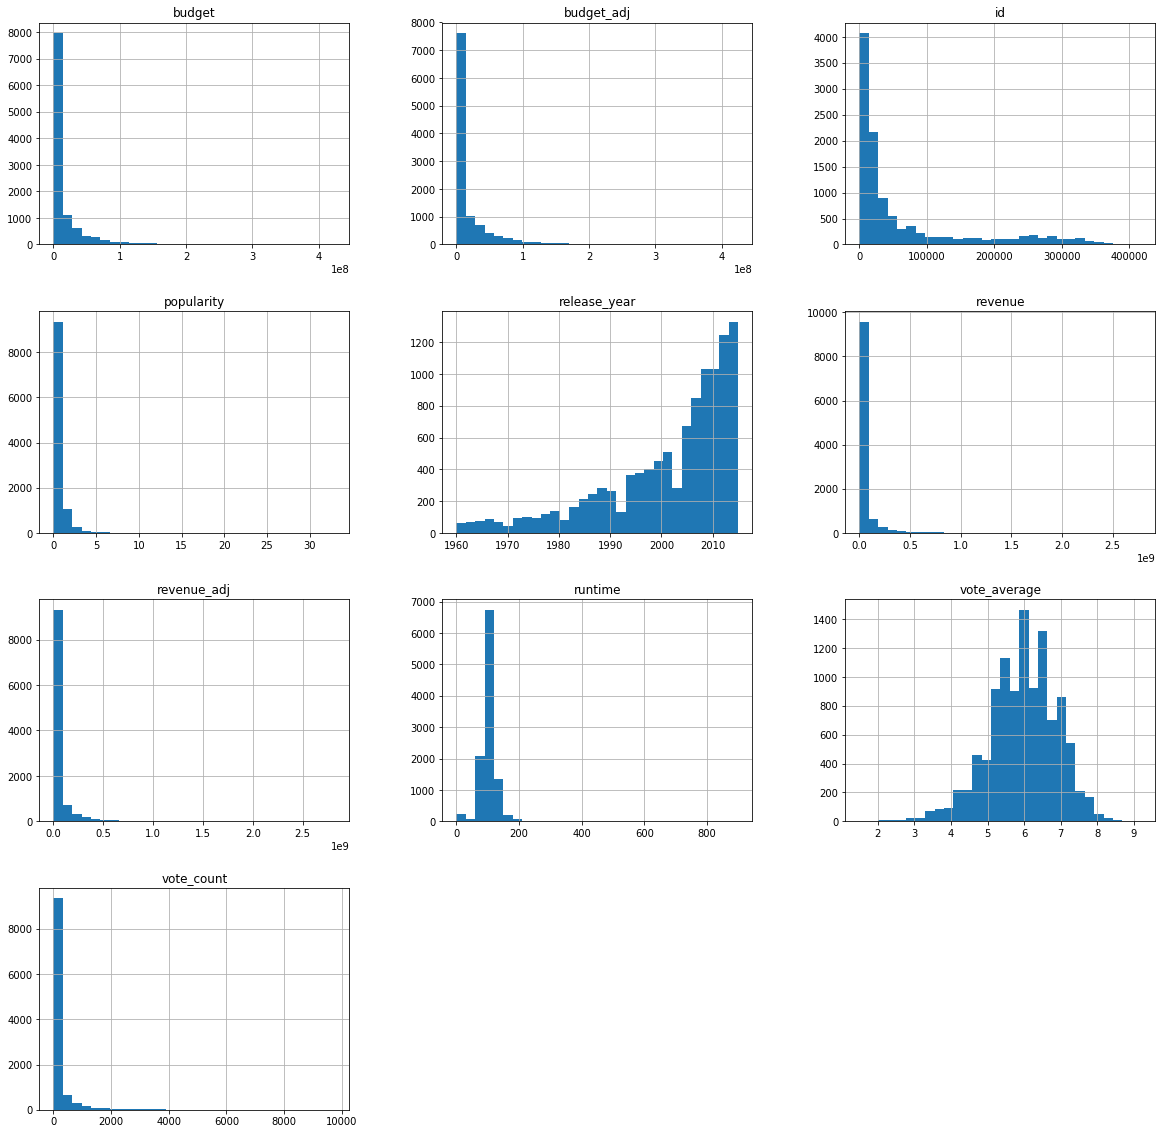

In [8]:
df.hist(bins=30,figsize=(20,20))

In [9]:
#清理预算为0的数据
#df.isnull().any()
df = df.query('budget > 0')

df = df.query('revenue > 0')

In [10]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6073.500000,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025C9ABC9400>,
      dtype=object)

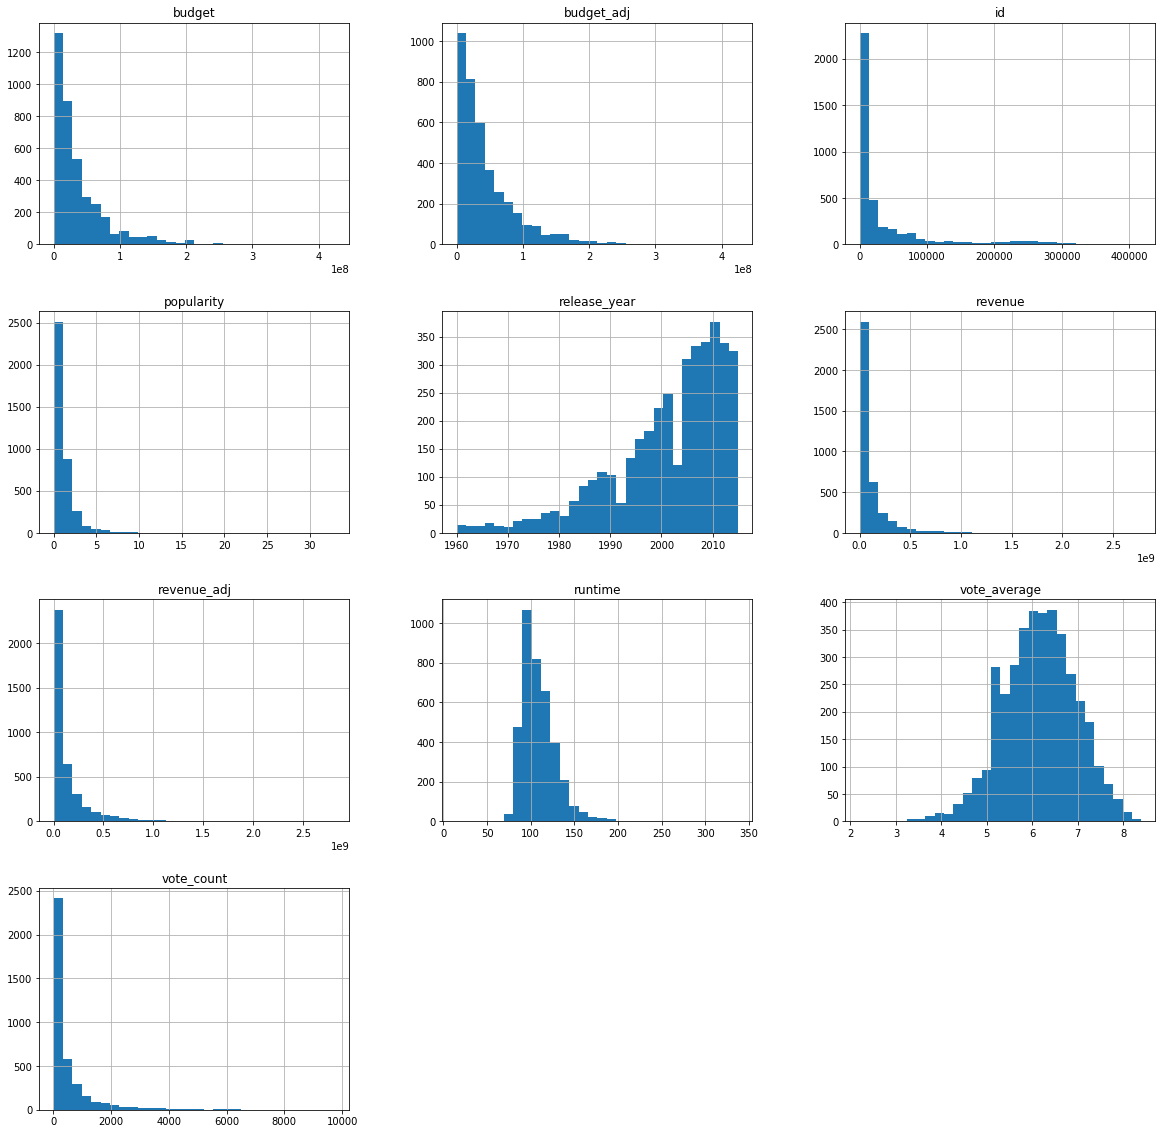

In [11]:
df.hist(bins=30,figsize=(20,20))

####  从直方图上来看，budget和budget_adj的分布趋势，revenue和revenue_adj的分布趋势一致，所以使用任意一项来都可以用来预测popularity。
#### release_year的分布趋势也是比较明显由远及近呈线性增加。 

####  电影上映日期数据整理
#### 首先需要对 release_date 数据进行整理，提取出上线的月份，然后添加到dataframe当中的新的列release_date_month当中。

In [12]:
#type(df['release_date'][0])
#df['release_date']#截取月份
df['release_date_month'] = df['release_date'].str.extract('(\d+)').astype(int)

D:\anacoda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


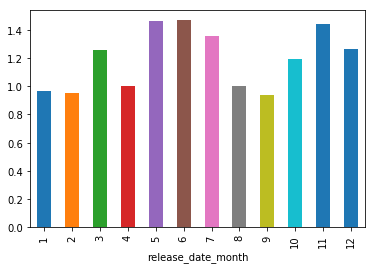

In [13]:
#df.plot(x='release_date_month',y='popularity',kind='scatter')
df.groupby('release_date_month')['popularity'].mean().plot(kind='bar')#按月份分组，与欢迎程度之间的柱状图展现

### 结论[release_date]，对于上映月份的统计，可以看出来电影的popularity在不同的月份表现不一样。
### 在年中5，6，7月份，以及年末10，11，12月份表现比较高。

### 分析[runtime]电影播放时时长runtime需要为其按照25%，50%，75%的分为进行4个区域的数据分组划分，
### 再来统计各组popularity的平均值趋势。

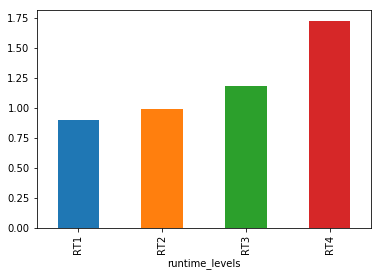

In [14]:
#按照播放时长来进行分类
runtime_edges = [15,95,106 ,119 ,338 ] # 用刚才计算的五个值填充这个列表
runtime_names = [ 'RT1','RT2','RT3' ,'RT4' ] # 对每个播放时长水平类别进行命名
df['runtime_levels'] = pd.cut(df['runtime'], runtime_edges, labels=runtime_names)
df.groupby('runtime_levels')['popularity'].mean().plot(kind='bar')#按播放时长分组，计算bar图片

### 结论[runtime] 电影的受欢迎程度和播放时长成递增相关的线性关系。

### 分析[release_year] 对上映年份进行分析，与popularity有什么关系
### 同时分析每年的电影产出的数量

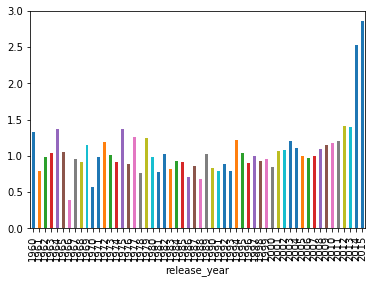

In [15]:
#按照上映年份来进行播放
df.groupby('release_year')['popularity'].mean().plot(kind='bar')#按播放时长分组，计算bar图片


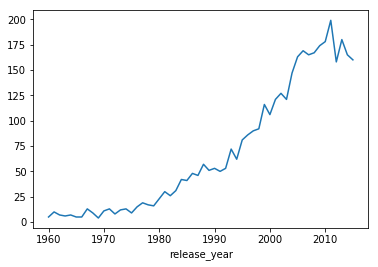

In [16]:
df.groupby('release_year')['popularity'].count().plot()#按播放时长分组，计算bar图片


### 结论[release_year] 上线年份对popularity没有太直观的影响，基本在同一个水品线上下波动，但是2014年和2015年两年的波动很大，可能popularity数据上存在一定的问题。

### 分析[budget]  数据，budget按照数据分布进行分组划分。

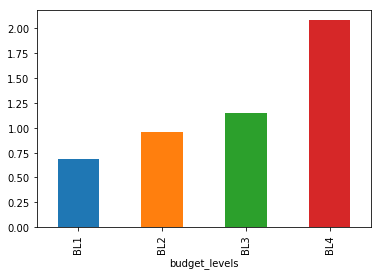

In [17]:
budget_edges = [1,10000000,24000000 ,50000000 ,425000000 ] # 用刚才计算的五个值填充这个列表
budget_names = [ 'BL1','BL2','BL3' ,'BL4' ] # 对每个播放时长水平类别进行命名
df['budget_levels'] = pd.cut(df['budget'], budget_edges, labels=budget_names)
df.groupby('budget_levels')['popularity'].mean().plot(kind='bar')#按播放时长分组，计算bar图片

### 结论[budget]
### 预算越高，popularity越高

### 分析 [revenue] 对票房收入进行数据分组，统计其对popularity的影响。

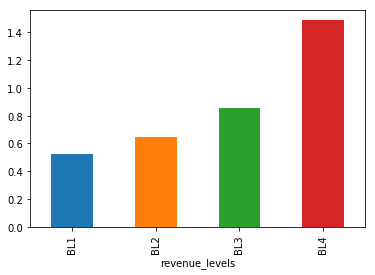

In [18]:
revenue_edges = [2,13600000,44800000 ,124212500 ,2781506000 ] # 用刚才计算的五个值填充这个列表
revenue_names = [ 'RV1','RV2','RV3' ,'RV4' ] # 对每个播放时长水平类别进行命名
df['revenue_levels'] = pd.cut(df['revenue'], budget_edges, labels=budget_names)
df.groupby('revenue_levels')['popularity'].mean().plot(kind='bar')#按播放时长分组，计算bar图片

### 结论[revenue] 票房收入越高也说明了，受欢迎程度越高。

## Final结论
### 1、总体上而言，电影受欢迎程度和以下几个因素相关性比较大。
###    上映月份，播放时长，预算金额。这三个直接影响了电影的受欢迎程度。
###    同时，受欢迎程度高的电影，其收入也会高，是一个线性递增的关系。
    
### 2、数据上的问题：
###    从上映年份上来看，越是靠近现代的年份，拍摄的电影数量越高。
###    但是对于受欢迎程度没有太大影响，但是2014，2015两年的数据有点偏高，属于是突变的变化，
###   具体原因还有待查询。
### 3、对于预算，收入的数据当中存在为0的数据，可能对最终的统计数据有一定影响，
###  但是从直方图当中的数据分布来看， ###   在除去为0的数据之后，数据分布趋势没有明显变化，所以数据的影响趋###  势不大。